In [76]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
import string
import matplotlib.pyplot as plt
import seaborn as sns

1. Data visualization
2. Data pre-processing
3. Model

In [2]:
train_data_path = ('./feedback-prize-english-language-learning/train.csv')
test_data_path = ('./feedback-prize-english-language-learning/test.csv')

In [3]:
def load_data(path):
    corpus = pd.read_csv(path)
    return corpus

## Data exploration

In [4]:
df = load_data(train_data_path)

In [5]:
df.head(10)

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5
5,004AC288D833,"Dear Principal,\r\n\r\nOur school should have ...",3.5,4.0,4.0,3.5,3.5,4.0
6,005661280443,Imagine if you could prove other people that y...,3.5,4.0,3.5,3.5,4.0,4.0
7,008DDDDD8E8D,I think it's a good idea for the estudnets to ...,2.5,2.5,2.5,2.5,2.5,2.0
8,009BCCC61C2A,positive attitude is the key to success. I agr...,3.0,3.0,3.5,3.5,3.0,3.0
9,009F4E9310CB,Asking more than one person for and advice hel...,3.0,3.0,3.5,2.5,3.0,2.5


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cohesion,3911.0,3.127077,0.662542,1.0,2.5,3.0,3.5,5.0
syntax,3911.0,3.028254,0.644399,1.0,2.5,3.0,3.5,5.0
vocabulary,3911.0,3.235745,0.583148,1.0,3.0,3.0,3.5,5.0
phraseology,3911.0,3.116850,0.655997,1.0,2.5,3.0,3.5,5.0
grammar,3911.0,3.032856,0.699841,1.0,2.5,3.0,3.5,5.0
conventions,3911.0,3.081053,0.671450,1.0,2.5,3.0,3.5,5.0


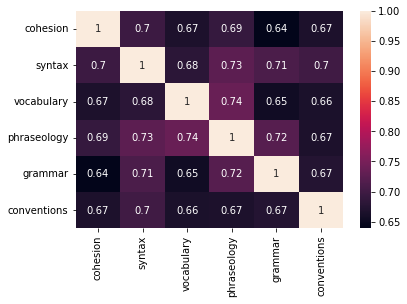

In [10]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [12]:
vocabulary_cohesion = df[['full_text', 'vocabulary', 'cohesion']]

In [13]:
vocabulary_cohesion.describe().T

,count,mean,std,min,25%,50%,75%,max
vocabulary,3911.0,3.235745,0.583148,1.0,3.0,3.0,3.5,5.0
cohesion,3911.0,3.127077,0.662542,1.0,2.5,3.0,3.5,5.0


In [14]:
vocabulary_conventions = df[['full_text', 'vocabulary', 'conventions']]

In [15]:
vocabulary_conventions.describe().T

,count,mean,std,min,25%,50%,75%,max
vocabulary,3911.0,3.235745,0.583148,1.0,3.0,3.0,3.5,5.0
conventions,3911.0,3.081053,0.671450,1.0,2.5,3.0,3.5,5.0


In [16]:
vocabulary_phraseology = df[['vocabulary', 'phraseology']]

In [17]:
vocabulary_phraseology.describe().T

,count,mean,std,min,25%,50%,75%,max
vocabulary,3911.0,3.235745,0.583148,1.0,3.0,3.0,3.5,5.0
phraseology,3911.0,3.116850,0.655997,1.0,2.5,3.0,3.5,5.0


In [18]:
vocabulary_syntax = df[['full_text', 'vocabulary', 'syntax']]

In [19]:
vocabulary_syntax.describe().T

,count,mean,std,min,25%,50%,75%,max
vocabulary,3911.0,3.235745,0.583148,1.0,3.0,3.0,3.5,5.0
syntax,3911.0,3.028254,0.644399,1.0,2.5,3.0,3.5,5.0


In [20]:
vocabulary_grammar = df[['full_text', 'vocabulary', 'grammar']]

In [21]:
vocabulary_grammar.describe().T

,count,mean,std,min,25%,50%,75%,max
vocabulary,3911.0,3.235745,0.583148,1.0,3.0,3.0,3.5,5.0
grammar,3911.0,3.032856,0.699841,1.0,2.5,3.0,3.5,5.0


In [22]:
grammar_syntax = df[['grammar', 'phraseology']]

In [23]:
grammar_syntax.describe().T

,count,mean,std,min,25%,50%,75%,max
grammar,3911.0,3.032856,0.699841,1.0,2.5,3.0,3.5,5.0
phraseology,3911.0,3.116850,0.655997,1.0,2.5,3.0,3.5,5.0


## Data Visualization

/home/spyros/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

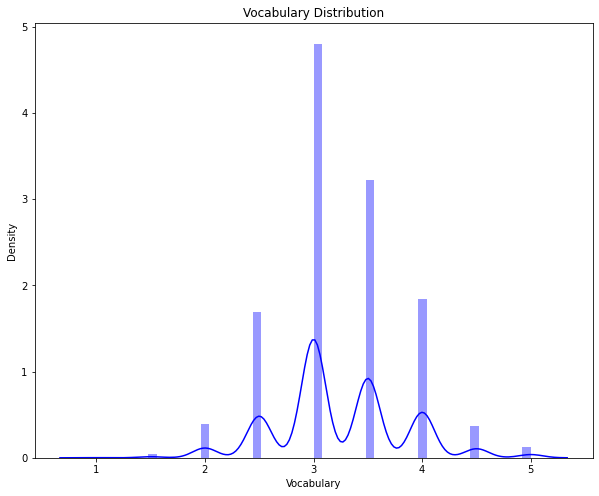

In [25]:
fig = plt.figure(figsize=(10,8))
sns.distplot(df['vocabulary'], color='blue')
plt.title('Vocabulary Distribution')
plt.xlabel('Vocabulary')
plt.ylabel('Density')

/home/spyros/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

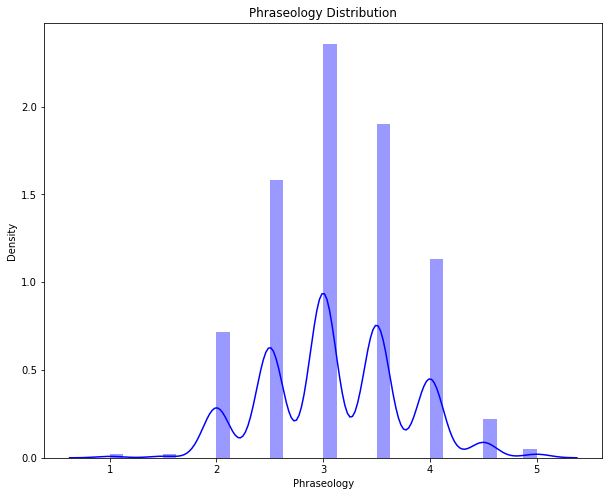

In [26]:
fig = plt.figure(figsize=(10,8))
sns.distplot(df['phraseology'], color='blue')
plt.title('Phraseology Distribution')
plt.xlabel('Phraseology')
plt.ylabel('Density')

### Data pre processing

In [27]:
def tokenize_data(data):
    tokens = word_tokenize(data)
    return tokens

In [28]:
def lowercase_data(data):
    lowercase = np.char.lower(data)
    return lowercase

In [29]:
def remove_punctuation(data):
    symbols = "!\"#$%&()*+-.,/:;<=>?@[\]^_`{|}~\n"
    no_punctuation = data
    for i in symbols:
        no_punctuation = np.char.replace(no_punctuation, i, ' ')
        no_punctuation = np.char.replace(no_punctuation, "'", "")        
        
    return no_punctuation

In [30]:
def numbers_to_words(data):
    newData = []
    for i in data:
        if i != str(i):
            num = num2words(i)
            newData.append(num)
        else:
            newData.append(i)
    return newData

In [31]:
def remove_stop_words(data):
    stop_words = set(stopwords.words('english'))
    words = [w for w in data if not w in stop_words]
    return words

In [32]:
def lemmatize_words(data):
    a = []
    lemmatizer = WordNetLemmatizer()
    for i in data:
        lemmatized_word = lemmatizer.lemmatize(i)
        a.append(lemmatized_word)
    return a

In [33]:
def data_cleaning(data):
    df = data
    # Loop through data and clean it.
    for i in data:
       
        ndata = tokenize_data(i)
        ndata = remove_punctuation(ndata)
        ndata = lowercase_data(ndata)
        ndata = numbers_to_words(ndata)
        ndata = remove_stop_words(ndata)
        ndata = lemmatize_words(ndata)
        ndata = numbers_to_words(ndata)
        ndata = ' '.join(ndata)
        ndata = remove_punctuation(ndata)
        
        
        
        df = df.replace(i, ndata)

    return df

In [34]:
def split_test_validation(data):    
    train_d, val_d = train_test_split(data, test_size=0.1, random_state=1)

    return train_d, val_d

In [35]:
def tf_idf(data, feature_num):
    
    vectorizer = TfidfVectorizer(max_features=feature_num,
                                 max_df=0.9,
                                 min_df=0.1
                                 )
    vectors = vectorizer.fit_transform(data)
    dense = vectors.todense()
    denselist = dense.tolist()
    feature_names = vectorizer.get_feature_names_out()
    vocabulary = vectorizer.vocabulary_
    
    all_keywords = []
    for i in denselist:
        x = 0
        keywords = []
        for word in i:
            if word > 0:
                keywords.append(feature_names[x])
            x=x+1
        all_keywords.append(keywords)
            
#     , denselist, feature_names, all_keywords, vocabulary
    return vectors, vectorizer

In [36]:
def tfidf_pipeline(data_path):
    data = load_data(data_path)
    #Split dataset to train and validation data
    train_data, validation_data = split_test_validation(data)
    x_train = train_data['full_text']
    y_train = np.asarray(train_data['vocabulary'])
    
    # Clean data
    clean_data = data_cleanning(x_train)
    
    # perform tfidf to clean data
    vectors, vectorizer = tf_idf(clean_data['full_text'])
    
    # Convert vectoried data with keywords into a dataframe
#     data=[]
#     for i in range(len(all_keywords)):
#         data.insert(i, {'words':all_keywords[i],'vectors':denselist[i],})
#     dataframe = data

    return vectors, vectorizer, y_train, validation_data

In [37]:
def vectorize(feature_num):
    data = load_data(train_data_path)
    data_text = data['full_text']
    clean_data = data_cleaning(data_text)
    vectors, vectorizer = tf_idf(clean_data, feature_num)
    return vectors, vectorizer, clean_data

In [194]:
vectors10, vectorizer10, clean_data10 = vectorize(10)

In [193]:
vectors50, vectorizer50, clean_data50 = vectorize(50)

In [ ]:
vectors100, vectorizer100, clean_data100 = vectorize(100)

In [253]:
vectors200, vectorizer200, clean_data200 = vectorize(200)

In [38]:
vectors1000, vectorizer1000, clean_data1000 = vectorize(1000)

In [39]:
vectors5000, vectorizer5000, clean_data5000 = vectorize(5000)

In [218]:
vectors20000, vectorizer20000, clean_data20000 = vectorize(20000)

In [42]:
# List of all vectors and words
weights = vectors1000.toarray()
vocab = vectorizer1000.get_feature_names_out()
# Dataframe of both together
dataframe = pd.DataFrame(weights, columns=vocab)
dataframe['keyword'] = dataframe.idxmax(axis=1)
dataframe['Max'] = dataframe.max(axis=1)
dataframe['Sum'] = dataframe.drop('Max', axis=1).sum(axis=1)
dataframe.head(10)

/tmp/ipykernel_162713/130842586.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataframe['Max'] = dataframe.max(axis=1)
/tmp/ipykernel_162713/130842586.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataframe['Sum'] = dataframe.drop('Max', axis=1).sum(axis=1)


,able,accomplish,activity,agree,already,also,always,another,anything,around,...,wo,work,working,world,would,wrong,year,keyword,Max,Sum
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.083207,0.000000,...,0.000000,0.050789,0.000000,0.000000,0.056695,0.000000,0.0,cause,0.420132,5.234868
1,0.000000,0.000000,0.000000,0.000000,0.0,0.021114,0.000000,0.000000,0.000000,0.070994,...,0.000000,0.082872,0.000000,0.000000,0.000000,0.038463,0.0,change,0.512929,4.929603
2,0.170962,0.000000,0.418408,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.058425,0.000000,0.000000,0.000000,0.0,sport,0.576605,4.595909
3,0.041259,0.000000,0.000000,0.114870,0.0,0.157186,0.000000,0.000000,0.000000,0.000000,...,0.051957,0.000000,0.000000,0.153549,0.086088,0.095448,0.0,make,0.382393,6.104277
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.175854,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.066949,0.000000,0.0,change,0.464012,4.957004
5,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.162478,0.067554,0.0,student,0.642095,4.433597
6,0.000000,0.037361,0.000000,0.053654,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.054033,0.000000,0.000000,0.000000,0.000000,0.0,problem,0.903921,2.963315
7,0.000000,0.000000,0.000000,0.000000,0.0,0.040031,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.078562,0.000000,0.058657,0.000000,0.000000,0.0,study,0.407012,5.126880
8,0.000000,0.211439,0.000000,0.101216,0.0,0.000000,0.127351,0.049812,0.111327,0.000000,...,0.000000,0.101931,0.000000,0.000000,0.037928,0.000000,0.0,positive,0.641336,5.473402
9,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.063848,0.000000,0.0,opinion,0.582533,5.074303


### Top 30 frequently occured words

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
countVectorizer = CountVectorizer(analyzer='word', ngram_range=(1,1))

In [46]:
x = countVectorizer.fit_transform(clean_data1000)

In [47]:
occ = np.asarray(x.sum(axis=0)).ravel().tolist()

In [48]:
words_in_corpus = sum(occ)
words_in_corpus

782034

In [49]:
counts = pd.DataFrame({'Term': countVectorizer.get_feature_names_out(), 'Occurences':occ})

In [50]:
counts.sort_values(by='Occurences', ascending=False)

,Term,Occurences
16588,student,17204
12718,people,15665
15121,school,14516
11874,nt,9695
17618,time,9306
...,...,...
1439,aspriration,1
9633,interfir,1
9634,interion,1
9638,internacional,1


## Top 30 weighted occured words

In [52]:
weights = vectors1000.toarray()
vocab = vectorizer1000.get_feature_names_out()

In [53]:
weights = np.asarray(weights.mean(axis=0)).ravel().tolist()

In [54]:
weights_df = pd.DataFrame({'Term': vocab, 'Weight': weights})

In [55]:
weights_df.sort_values(by='Weight', ascending=False).head(30)

,Term,Weight
153,student,0.141997
127,people,0.109778
140,school,0.106272
118,nt,0.073432
92,life,0.068621
183,work,0.065949
170,time,0.065825
186,would,0.063470
64,good,0.063169
58,get,0.062817


#### Split data 

In [196]:
train_data10 = vectors10[:3800].toarray()

In [195]:
train_data50 = vectors50[:3800].toarray()

In [ ]:
train_data100 = vectors100[:3800].toarray()

In [254]:
train_data200 = vectors200[:3800].toarray()

In [56]:
train_data1000 = vectors1000[:3800].toarray()

In [57]:
train_data5000 = vectors5000[:3800].toarray()

In [219]:
train_data20000 = vectors20000[:3800].toarray()

In [197]:
 validation_data10 = vectors10[3800:3910].toarray()

In [198]:
validation_data50 = vectors50[3800:3910].toarray()

In [ ]:
validation_data100 = vectors100[3800:3910].toarray()

In [255]:
validation_data200 = vectors200[3800:3910].toarray()

In [58]:
validation_data1000 = vectors1000[3800:3910].toarray()

In [59]:
validation_data5000 = vectors5000[3800:3910].toarray()

In [220]:
validation_data20000 = vectors20000[3800:3910].toarray()

In [199]:
x_train10 = train_data10

In [200]:
x_train50 = train_data50

In [ ]:
x_train100 = train_data100

In [256]:
x_train200 = train_data200

In [60]:
x_train1000 = train_data1000

In [61]:
x_train5000 = train_data5000

In [221]:
x_train20000 = train_data20000

In [223]:
y_train = df['vocabulary'][:3800]

In [201]:
x_test10 = validation_data10

In [202]:
x_test50 = validation_data50

In [ ]:
x_test100 = validation_data100

In [257]:
x_test200 = validation_data200

In [64]:
x_test1000 = validation_data1000

In [65]:
x_test5000 = validation_data5000

In [222]:
x_test20000 = validation_data20000

In [400]:
y_test = df['vocabulary'][3800:3910]
y_test.shape

(110,)

In [401]:
y_train = (y_train * 2).astype(int)

In [402]:
y_train.shape

(3800,)

In [403]:
y_test = (y_test * 2).astype(int)
y_test

3800    5
3801    5
3802    7
3803    8
3804    6
       ..
3905    6
3906    6
3907    8
3908    6
3909    9
Name: vocabulary, Length: 110, dtype: int64

Pick indeces that have vocabulary rating > 5.5 and < 5.5

In [305]:
positiveIndeces = []
negativeIndeces = []
for i in range(0, len(y_train)):
    if y_train[i]>5.5:
        positiveIndeces.append(i)
    else:
        negativeIndeces.append(i)

In [306]:
len(positiveIndeces)

3148

In [307]:
len(negativeIndeces)

652

Create a dataframe with 1s and 0s for higher and lower respectively. 

In [308]:
positive_x_train = []
negative_x_train = []
for i in positiveIndeces:
    positive_x_train.append(df['full_text'][i])
for i in negativeIndeces:
    negative_x_train.append(df['full_text'][i])

In [309]:
len(positive_x_train)

3148

In [310]:
len(negative_x_train)

652

First. Create a new x_train with 652 positive and 652 negative and train with the tfidf

In [347]:
positiveIndeces = positiveIndeces[:652]

AttributeError: 'list' object has no attribute 'toarray'

In [348]:
positiveIndeces = np.array(positiveIndeces)

In [349]:
negativeIndeces = np.array(negativeIndeces)

In [354]:
Indeces = np.concatenate((positiveIndeces, negativeIndeces), axis=0)

In [360]:
Indeces = np.sort(Indeces)

In [364]:
x_train_Vectors = []
for i in Indeces:
    x_train_Vectors.append(train_data200[i])

In [366]:
y_train_new = []
for i in Indeces:
    y_train_new.append(y_train[i])
    

In [384]:
for i in range(0, len(y_train_new)):
    if y_train_new[i] >5.5:
        y_train_new[i] = 1
    elif y_train_new[i] <5.5:
        y_train_new[i] = 0
    

In [385]:
y_train_new

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


Populate x_train with vectors

In [264]:
x_train

,index,vectors
0,None,None


#### Standard Scaler and squared x_train, x_test

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()

In [ ]:

x_train50_scaled = scaler.fit_transform(x_train50)
x_train100_scaled = scaler.fit_transform(x_train100)
x_train200_scaled = scaler.fit_transform(x_train200)


x_test50_scaled = scaler.fit_transform(x_test50)
x_test100_scaled = scaler.fit_transform(x_test100)
x_test200_scaled = scaler.fit_transform(x_test200)


In [73]:
x_train1000_scaled = scaler.fit_transform(x_train1000)
x_train5000_scaled = scaler.fit_transform(x_train5000)
x_test1000_scaled = scaler.fit_transform(x_test1000)
x_test5000_scaled = scaler.fit_transform(x_test5000)

In [1]:
x_train50_scaled = x_train50_scaled**2
x_train100_scaled = x_train100_scaled**2
x_train200_scaled = x_train200_scaled**2


x_test50_scaled = x_test50_scaled**2
x_test100_scaled = x_test100_scaled**2
x_test200_scaled = x_test200_scaled**2
x_test1000_scaled = x_test1000_scaled**2

NameError: name 'x_train50_scaled' is not defined

In [ ]:
x_train1000_scaled = x_train1000_scaled**2
x_train5000_scaled = x_train5000_scaled**2
x_test1000_scaled = x_test1000_scaled**2
x_test5000_scaled = x_test5000_scaled**2

Y_test multiplied by 2 to extend the scale

In [ ]:
y_test[:3810]

## Models

In [ ]:
# Import Libraries
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree

In [394]:
def binary_accuracy(prediction, actual, train:bool):
    tp = []
    tn = []
    fp = []
    fn = []
    if train:
        for i in range(0, len(prediction)):
            if prediction[i]>=5 & actual[i]>=5:
                tp.append(1)
            elif prediction[i]<=5 & actual[i]<=5:
                tn.append(1)
            elif prediction[i]<=5 & actual[i]>=5:
                fn.append(1)
            elif prediction[i]>=5 & actual[i]<=5:
                fp.append(1)
    else:
        for i in range(0, len(prediction)):
            if prediction[i]>=5 & actual[i+3800]>=5:
                tp.append(1)
            elif prediction[i]<=5 & actual[i+3800]<=5:
                tn.append(1)
            elif prediction[i]<=5 & actual[i+3800]>=5:
                fn.append(1)
            elif prediction[i]>=5 & actual[i+3800]<=5:
                fp.append(1)
        
    tp = sum(tp)
    tn = sum(tn)
    fp = sum(fp)
    fn = sum(fn)
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
#     f1_score = (2 * tp) / (2*tp + fp + fn)
    
    return accuracy

In [ ]:
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10)),
    ('std_scaler', StandardScaler())
])

## Feature Selection

In [244]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

Implement Recursive Feature Selection SVM

In [243]:
x_train_df = pd.DataFrame(x_train50, columns=x_train50)

ValueError: Index data must be 1-dimensional

Pearson's Correlation Coefficient

In [187]:
from sklearn.feature_selection import f_regression

In [236]:
x_selected = f_regression(x_train10, y_train)

In [237]:
np.array(x_selected).shape

(2, 10)

In [411]:
x_selected.shape

AttributeError: 'tuple' object has no attribute 'shape'

#### Logistic Regression

In [ ]:
log_model = LogisticRegression(max_iter=1400, multi_class='multinomial', class_weight='balanced', solver='newton-cg', C=1)

In [ ]:
log_model.fit(x_train50_scaled, y_train)

In [ ]:
# Training accuracy
y_pred_train = log_model.predict(x_train50_scaled)
print(y_pred_train.shape)
print(y_train.shape)
print('Accuracy of Training Data: ', binary_accuracy(y_pred_train, y_train, True)*100)

In [ ]:
# Test accuracy 
y_pred_test = log_model.predict(x_test50_scaled)
print(y_pred_test.shape)
print(y_test.shape)
print('Accuracy of Test Data: ', binary_accuracy(y_pred_test, y_test, False)*100)

In [ ]:
log_model.fit(x_train5000_scaled, y_train)

In [ ]:
y_pred_train = log_model.predict(x_train5000_scaled)
print('Accuracy of Train Data: ', binary_accuracy(y_pred_train, y_train, True)*100)

#### SGDClassifier

In [ ]:
sgdC = SGDClassifier(loss='hinge')

In [ ]:
sgdC.fit(x_train100, y_train)

In [ ]:
sgdC_prediction = sgdC.predict(x_train100)
print('Accuracy of Test Data: ', binary_accuracy(sgdC_prediction, y_train, True)*100)

In [ ]:
sgdC_prediction = sgdC.predict(x_test100)
print('Accuracy of Test Data: ', binary_accuracy(y_pred_test, y_test, False)*100)

#### Decision Tree

In [ ]:
decisionTree = tree.DecisionTreeClassifier()

In [ ]:
decisionTree.fit(x_train100_scaled, y_train)

In [ ]:
tree_prediction = decisionTree.predict(x_train100_scaled)

print('Accuracy of Test Data: ', binary_accuracy(tree_prediction, y_train, True)*100)

In [ ]:
tree_prediction = decisionTree.predict(x_test100_scaled)
print('Accuracy of Test Data: ', binary_accuracy(tree_prediction, y_test, False)*100)

In [ ]:
decisionTree.fit(x_train1000, y_train)


tree_prediction = decisionTree.predict(x_train1000)

print('Accuracy of Test Data: ', binary_accuracy(tree_prediction, y_train, True)* 100)

LinearSVC. StandardScaler

In [373]:
from sklearn import svm

In [386]:
linearSVC = Pipeline([
    ('linear_svc', svm.LinearSVC())
])

In [387]:
linearSVC.fit(x_train_Vectors, y_train_new)

Pipeline(steps=[('linear_svc', LinearSVC())])

In [388]:
predictLSVC = linearSVC.predict(x_train_Vectors)
predictLSVC

array([0, 0, 1, ..., 0, 0, 0])

In [389]:
print('Accuracy Score: ', binary_accuracy(predictLSVC, y_train_new, True)*100)

Accuracy Score:  87.0398773006135


Naive Bayes

In [143]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
naive = MultinomialNB()

In [ ]:
naive.fit(x_train_scaled, y_train)

In [ ]:
prediction_NB = naive.predict(x_test_scaled)

In [ ]:
print('Naive Bayes Accuracy Score: ', accuracy_score(prediction_NB, y_test)*100)

Non-linear SVM. PolynomialFeatures, StandradScaler

Polynomial kernel. StandardScaler

 Gaussian Kernel. StandardScaler

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
onevsrest = OneVsRestClassifier(svm.SVC(kernel='rbf', gamma=2, C=10))
onevsrest.fit(x_train5000_scaled, y_train)

In [ ]:
onevsrestPred = onevsrest.predict(x_train5000_scaled)
onevsrestPred
print('Accuracy : ', binary_accuracy(x_train5000_scaled, y_train, True)*100)

In [390]:
svm_clf = svm.SVC(kernel='poly', degree=13, coef0=1, C=5)


In [391]:
svm_clf.fit(x_train_Vectors, y_train_new)

SVC(C=5, coef0=1, degree=13, kernel='poly')

In [404]:
predictionSVM = svm_clf.predict(x_test200[5].reshape(1,-1))
predictionSVM


array([1])

In [410]:
y_test[3805]

8

In [395]:
print('SVM Accuracy Score: ', binary_accuracy(predictionSVM, y_train_new, True)*100)

SVM Accuracy Score:  100.0


In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
linearSVC = LinearSVC()

In [ ]:

# Validation data vocabulary

# Transform train data to useful values
# x_train = (vectors1[:3500].toarray() * 10000).astype(int)
# y_train = (y_train1[:3500] * 2).astype(int)

clf = svm.SVC(kernel='rbf', gamma=0.1, C=0.01)
# clf.fit(x_train, y_train)


In [ ]:
x_train.shape

In [ ]:
x_test = tf_idf(validation_data['full_text'])
x_test = (x_test.toarray() * 10000).astype(int)
x_test

In [ ]:

from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
x_train_scaled

In [ ]:
# Hyperparameter tuning using grid search

params_grid = [{'kernel':['rbf'], 'gamma':[1e-3, 1e-4],
               'C': [1,10,100,1000]},
              {'kernel':['linear'], 'C':[1,10,100,1000]}]

In [ ]:
# Train SVM model using radial kernel

svm_model = GridSearchCV(svm.SVC(), params_grid, cv=5)
svm_model.fit(x_train, y_train)

In [ ]:
print('Best score for training data:', svm_model.best_score_,'\n')
print('Best C:', svm_model.best_estimator_.C, '\n')
print('Best Gamma:', svm_model.best_estimator_.gamma,'\n')
final_model = svm_model.best_estimator_
y_pred = final_model.predict(x_test)
print('xTest: ', y_pred)

In [ ]:
y_test = (validation_data['vocabulary'] * 2)
y_test

In [ ]:
clf.predict(x_test)

In [ ]:
print((vectors.toarray() * 10000).astype(int))

In [ ]:
svm_(vectors, y_train, validation_data)

In [ ]:
x_train = dataframe['vectors'][:20]
y_train = load_data(train_data_path)['vocabulary'][:20]


In [ ]:
data = load_data(train_data_path)

In [ ]:
clean_data = data_cleanning(data[:1000])

In [ ]:
vectors, denselist, feature_names, all_keywords, vocabulary = tf_idf(clean_data['full_text'])

In [ ]:
vectors.shape

In [ ]:
arr_vector = vectors.toarray()

In [ ]:
y_train = data['vocabulary'][:1000]

In [ ]:
data = data[1009:1010]

In [ ]:
clean_x_test = data_cleanning(data)
clean_x_test 
vectors, denselist, feature_names, all_keywords, vocabulary = tf_idf(clean_x_test)
clean_x_test = vectors.toarray()

In [ ]:
clean_x_test.shape

In [ ]:
arr_vector.shape

In [ ]:
y_train.shape

### Visualize data

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
plt.figure(figsize=(20,4))
_ = plt.imshow(arr_vector[:100])

In [ ]:
dummyx = [[40444, 34093093, 398434, 0, 0, 232, 2323, 0],
          [0, 0, 0, 222, 2442, 446, 44, 0]]

In [ ]:
dummyy = [3, 2]

In [ ]:
from sklearn import model_selection, naive_bayes, svm

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [ ]:
model = svm.SVC().fit(dummyx, dummyy)


In [ ]:
model.predict(clean_x_test)

In [ ]:
naive = naive_bayes.MultinomialNB()

In [ ]:
dataframe.to_csv('./tfidfDataInstances.csv')